In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



In [2]:
pantheon_data=pd.read_csv("/dsa/data/DSA-8630/mini_project/pantheon-project/database.csv")
pantheon_data.head(5)



,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [3]:
pantheon_data.tail(5)

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
11336,5891391,Sean St Ledger,Male,1984,Solihull,NaN,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
11337,5322451,Saina Nehwal,Female,1990,Hisar,NaN,India,Asia,29.16670,75.71670,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
11338,33525706,Rūta Meilutytė,Female,1997,Kaunas,NaN,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821
11339,22938476,Vladimír Weiss,Male,1989,Bratislava,NaN,Slovakia,Europe,48.14389,17.10972,Soccer Player,Team Sports,Sports,27,12479,462,10.2495
11340,26535791,Missy Franklin,Female,1995,Los Angeles,CA,United States,North America,34.15611,-118.13194,Swimmer,Individual Sports,Sports,26,1894716,72874,9.8794


In [4]:
pantheon_data.describe()

,article_id,latitude,longitude
count,1.134100e+04,10294.000000,10294.000000
mean,2.282303e+06,39.931860,-7.039516
std,5.745971e+06,18.688257,55.118931
min,3.070000e+02,-51.633330,-175.200560
25%,7.056000e+04,37.916670,-56.072705
50%,2.754430e+05,43.716670,4.483330
75%,9.668110e+05,50.936390,17.210003
max,3.870783e+07,70.073330,178.017780


In [5]:
pantheon_data.dtypes

article_id                       int64
full_name                       object
sex                             object
birth_year                      object
city                            object
state                           object
country                         object
continent                       object
latitude                       float64
longitude                      float64
occupation                      object
industry                        object
domain                          object
article_languages               object
page_views                      object
average_views                   object
historical_popularity_index     object
dtype: object

In [6]:
pantheon_data.count()

#notice there are several columns with NaNs since they are less than 11341

article_id                     11341
full_name                      11341
sex                            11341
birth_year                     11341
city                           11341
state                           2172
country                        11308
continent                      11311
latitude                       10294
longitude                      10294
occupation                     11341
industry                       11341
domain                         11341
article_languages              11341
page_views                     11341
average_views                  11341
historical_popularity_index    11341
dtype: int64

In [7]:
pantheon_data.shape

(11341, 17)

In [8]:
#Dropping "article_id(column 0), full_name (colulmn 1) & "state" (column 5) & city (column 4) since have Nans that don't make
#sense to replace or with the case of country, add too much complexity to the dataset

p_data = pantheon_data.drop(pantheon_data.columns[[0, 1, 4, 5]], axis=1)

In [9]:
p_data.shape

(11341, 13)

In [10]:
p_data.head()

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [11]:
# sorting dataset by country column to see which rows have NaN data

p_data_sort_country = p_data.sort_values(by = ['country'], ascending = True)
p_data_sort_country.tail(34)



,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
6846,Male,1898,Zimbabwe,Africa,-20.17000,28.58000,Politician,Government,Institutions,31,384727,12411,22.3208
1157,Male,1954,NaN,Asia,22.27547,114.14383,Actor,Film And Theatre,Arts,81,44209817,545800,25.8672
2115,Male,750,NaN,Unknown,41.00000,28.96667,Politician,Government,Institutions,37,399180,10789,25.0467
2307,Male,1930,NaN,Africa,2.14861,21.51361,Politician,Government,Institutions,52,3539841,68074,24.9032
2390,Female,1945,NaN,Asia,16.80000,96.15000,Social Activist,Activism,Public Figure,83,11374261,137039,24.8552
3206,Male,1717,NaN,Unknown,41.00000,29.00000,Politician,Government,Institutions,44,759338,17258,24.3853
3260,Male,630,NaN,Unknown,41.00000,28.96667,Politician,Government,Institutions,45,419474,9322,24.3573
3289,Male,1860,NaN,Europe,62.01167,-6.76750,Physician,Medicine,Science & Technology,44,297060,6751,24.3423
3535,Male,1117,NaN,Europe,42.44129,19.26289,Politician,Government,Institutions,26,530221,20393,24.2083
4450,Male,1888,NaN,Europe,42.38000,18.92000,Politician,Government,Institutions,34,1242004,36530,23.7109


In [ ]:
# Missing Countries by looking at cities

#Victoria Peak= Hong Kong
#Lisala =  Congo
#Yangon = Myanmar
#Tórshavn = Faroe Islands
#Cetinje = Montenegro
#Saint-Denis = France
#Kyaukse = Myanmar
#Manatuto = EastTimor
#Paungdale = Myanmar
#Bongoville = Gabon

# Natmauk, Myanmar
# Yangon, Myanmar
# Dili, East Timor
# Ngapudaw Township, Myanmar
# Kowloon, Hong Kong
# Libreville, Gabon
# Mouila, Gabon
# Fizi Territory, Congo
# Nikšić, Montenegro
# Mbandaka, Congo
# Kinshasa, Congo
# Podgorica, Montenegro

# Myanmar = Yangon,Kyauks, Natmauk
# Hong Kong = Victoria Peak, Kowloon
# Congo = Lisala, Fizi Territory, Mbandaka, Kinshasa, Podgorica 
# Faroe Islands = Tórshavn
# Montenegro = Cetinje, Nikšić
# France = Saint-Denis
# East Timor = Manatuto, Dili
# Gabon = Bongoville, Libreville, Mouila




In [12]:
#sorting dataset by continent to see which rows have NaNs

p_data_sort_continent = p_data.sort_values(by = ['continent'], ascending = True)
p_data_sort_continent.tail(31)


,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
1973,Male,-159,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,27,802950,29739,25.1408
13,Male,-1800,Unknown,NaN,33.70000,43.50000,Religious Figure,Religion,Institutions,105,17824676,169759,30.6047
34,Male,-325,Unknown,NaN,NaN,NaN,Mathematician,Math,Science & Technology,117,10896731,93134,29.8846
54,Male,-620,Unknown,NaN,39.02056,31.28917,Writer,Language,Humanities,69,7898719,114474,29.4989
105,Male,-1,Unknown,NaN,NaN,NaN,Religious Figure,Religion,Institutions,63,11142102,176859,28.7693
165,Male,-2600,Unknown,NaN,NaN,NaN,Politician,Government,Institutions,52,3397134,65330,28.2012
250,Male,-80,Unknown,NaN,41.26667,13.61667,Architect,Design,Arts,53,3436829,64846,27.7414
272,Male,460,Unknown,NaN,NaN,NaN,Religious Figure,Religion,Institutions,57,2399613,42098,27.6315
300,Male,-99,Unknown,NaN,NaN,NaN,Philosopher,Philosophy,Humanities,56,2366355,42256,27.5164
332,Male,-1481,Unknown,NaN,NaN,NaN,Politician,Government,Institutions,48,2314325,48215,27.4158


In [13]:
#Filling in NaNs with "Unknown" in the Country and Continent columns

p_data["country"].fillna(value="Unknown", inplace=True)
p_data["continent"].fillna(value="Unknown", inplace = True)
p_data.head()



,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [14]:
#filling in NaNs in the latitude and longitude columns with 0

p_data["latitude"].fillna(value=0, inplace=True)
p_data["longitude"].fillna(value=0, inplace=True)
p_data.head()


,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [15]:
p_data.dtypes

sex                             object
birth_year                      object
country                         object
continent                       object
latitude                       float64
longitude                      float64
occupation                      object
industry                        object
domain                          object
article_languages               object
page_views                      object
average_views                   object
historical_popularity_index     object
dtype: object

In [16]:
#checking to see all of the NaNs were filled in.  All row counts should be 11341.

p_data.count()

sex                            11341
birth_year                     11341
country                        11341
continent                      11341
latitude                       11341
longitude                      11341
occupation                     11341
industry                       11341
domain                         11341
article_languages              11341
page_views                     11341
average_views                  11341
historical_popularity_index    11341
dtype: int64

In [17]:
# Found out that HDI column had some rows without data

p_data_sort_HDI = p_data.sort_values(by = ['historical_popularity_index'], ascending = True)
p_data_sort_HDI.tail(6)

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
11340,Female,1995,United States,North America,34.15611,-118.13194,Swimmer,Individual Sports,Sports,26,1894716,72874,9.8794
11321,Female,1985,Australia,Oceania,-14.46667,132.26667,Swimmer,Not Provided,Sports,26,463947,17844,Not Provided
11216,Male,1983,Slovenia,Europe,46.05556,14.50833,Soccer Player,Team Sports,Sports,26,229486,8826,Not Provided
11323,Female,2005,Spain,Europe,40.40000,-3.68333,Nobleman,Government,Institutions,28,Not Provided,Not Provided,Not Provided


In [18]:
# Filled in the rows without data in HDI column with 0

p_data_sort_HDI = p_data_sort_HDI.replace(['Not Provided'], 0)
p_data_sort_HDI.tail(6)

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
11340,Female,1995,United States,North America,34.15611,-118.13194,Swimmer,Individual Sports,Sports,26,1894716,72874,9.8794
11321,Female,1985,Australia,Oceania,-14.46667,132.26667,Swimmer,0,Sports,26,463947,17844,0
11216,Male,1983,Slovenia,Europe,46.05556,14.50833,Soccer Player,Team Sports,Sports,26,229486,8826,0
11323,Female,2005,Spain,Europe,40.40000,-3.68333,Nobleman,Government,Institutions,28,0,0,0


In [19]:
# In case other columns have cells with "not provided", replacing all cells with 'not provided' with 0

p_data = p_data.replace(['Not Provided'], 0)
p_data.tail(6)

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
11335,Male,1994,Netherlands,Europe,51.91667,4.50000,Soccer Player,Team Sports,Sports,27,0,21404,11.3956
11336,Male,1984,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
11337,Female,1990,India,Asia,29.16670,75.71670,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
11338,Female,1997,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821
11339,Male,1989,Slovakia,Europe,48.14389,17.10972,Soccer Player,Team Sports,Sports,27,12479,462,10.2495
11340,Female,1995,United States,North America,34.15611,-118.13194,Swimmer,Individual Sports,Sports,26,1894716,72874,9.8794


In [20]:
p_data.dtypes

sex                             object
birth_year                      object
country                         object
continent                       object
latitude                       float64
longitude                      float64
occupation                      object
industry                        object
domain                          object
article_languages               object
page_views                      object
average_views                   object
historical_popularity_index     object
dtype: object

In [21]:
# changing the columns that look like numbers but show up as object to numeric

p_data[["article_languages", "page_views","average_views", "historical_popularity_index"]] = p_data[["article_languages", "page_views","average_views", "historical_popularity_index"]].apply(pd.to_numeric)
p_data.head()



,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [22]:
# saw that row birth year for row 1522 was unknown

p_data.ix[1522]

sex                                        Male
birth_year                              Unknown
country                                 Unknown
continent                               Unknown
latitude                                      0
longitude                                     0
occupation                     Religious Figure
industry                               Religion
domain                             Institutions
article_languages                            41
page_views                              1338790
average_views                             32653
historical_popularity_index             25.5087
Name: 1522, dtype: object

In [23]:
# replacing birth year which was unknown to be 0
p_data['birth_year'] = p_data['birth_year'].replace(['Unknown'], 0)

In [24]:
p_data.ix[1522]

sex                                        Male
birth_year                                    0
country                                 Unknown
continent                               Unknown
latitude                                      0
longitude                                     0
occupation                     Religious Figure
industry                               Religion
domain                             Institutions
article_languages                            41
page_views                              1338790
average_views                             32653
historical_popularity_index             25.5087
Name: 1522, dtype: object

In [25]:
p_data.tail()

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
11336,Male,1984,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
11337,Female,1990,India,Asia,29.16670,75.71670,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
11338,Female,1997,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821
11339,Male,1989,Slovakia,Europe,48.14389,17.10972,Soccer Player,Team Sports,Sports,27,12479,462,10.2495
11340,Female,1995,United States,North America,34.15611,-118.13194,Swimmer,Individual Sports,Sports,26,1894716,72874,9.8794


In [26]:
# saw that birth year wasn't a real year

p_data.ix[3009]

sex                                  Male
birth_year                          1237?
country                            France
continent                          Europe
latitude                          50.2897
longitude                          2.7808
occupation                         Writer
industry                         Language
domain                         Humanities
article_languages                      30
page_views                         406283
average_views                       13543
historical_popularity_index       24.5036
Name: 3009, dtype: object

In [27]:
# replaced birth year with an actual year

p_data['birth_year'] = p_data['birth_year'].replace(['1237?'], 1237)

In [28]:
# saw birth year was a guess and changed it to a real year

p_data['birth_year'] = p_data['birth_year'].replace(['530s'], 530)

In [29]:
# made birth year results numeric

p_data[["birth_year"]] = p_data[["birth_year"]].apply(pd.to_numeric)

In [30]:
p_data.dtypes

sex                             object
birth_year                       int64
country                         object
continent                       object
latitude                       float64
longitude                      float64
occupation                      object
industry                        object
domain                          object
article_languages                int64
page_views                       int64
average_views                    int64
historical_popularity_index    float64
dtype: object

In [31]:
p_data.head()

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [32]:
# creating dummy variables for the columns that were objects

p_data_dummies = pd.get_dummies(p_data[['sex','country','continent','occupation','industry','domain']])


In [33]:
p_data1 = pd.concat([p_data, p_data_dummies], axis=1)
p_data1.head()

,sex,birth_year,country,continent,latitude,longitude,occupation,industry,domain,article_languages,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
0,Male,-384,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,...,0,0,0,0,0,1,0,0,0,0
1,Male,-427,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,...,0,0,0,0,0,1,0,0,0,0
2,Male,-4,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,...,0,0,0,0,0,0,1,0,0,0
3,Male,-469,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,...,0,0,0,0,0,1,0,0,0,0
4,Male,-356,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,...,0,0,0,0,0,0,1,0,0,0


In [34]:
#Dropping original columns converted to dummy variarables 

p_data2 = p_data1.drop(p_data1.columns[[0,2,3,6,7,8]], axis=1)
p_data2.head()

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
0,-384,40.33333,23.50000,152,56355172,370758,31.9938,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-427,37.96667,23.71667,142,46812003,329662,31.9888,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-4,32.50000,34.90000,214,60299092,281771,31.8981,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-469,37.96667,23.71667,137,40307143,294213,31.6521,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-356,40.80000,22.51667,138,48358148,350421,31.5840,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
#normalizing the data

stscaler = StandardScaler().fit(p_data2)
p_data2Norm = stscaler.transform(p_data2)
p_data2Norm

array([[-2.95550896,  0.19258151,  0.56878436, ..., -0.18054315,
        -0.37005723, -0.4280221 ],
       [-3.01774832,  0.0810899 ,  0.57290748, ..., -0.18054315,
        -0.37005723, -0.4280221 ],
       [-2.40548668, -0.1764409 ,  0.78572054, ..., -0.18054315,
        -0.37005723, -0.4280221 ],
       ..., 
       [ 0.49081484,  0.87880661,  0.57613184, ..., -0.18054315,
        -0.37005723,  2.33632794],
       [ 0.47923542,  0.56053125,  0.4471806 , ..., -0.18054315,
        -0.37005723,  2.33632794],
       [ 0.48791999, -0.09842277, -2.12639909, ..., -0.18054315,
        -0.37005723,  2.33632794]])

In [ ]:
####### starting hierarcharial clustering #######

In [36]:
link_matrix=hca.linkage(p_data2Norm,metric="euclidean",method="ward")

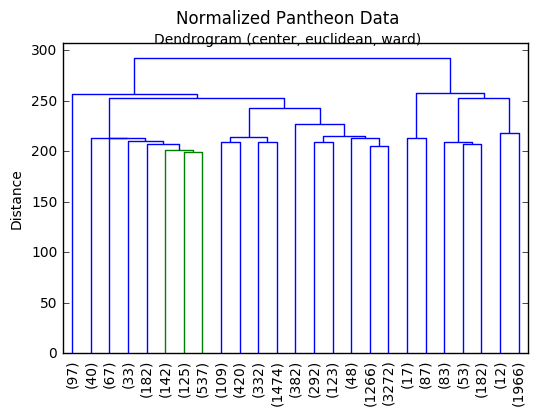

In [37]:
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Normalized Pantheon Data",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

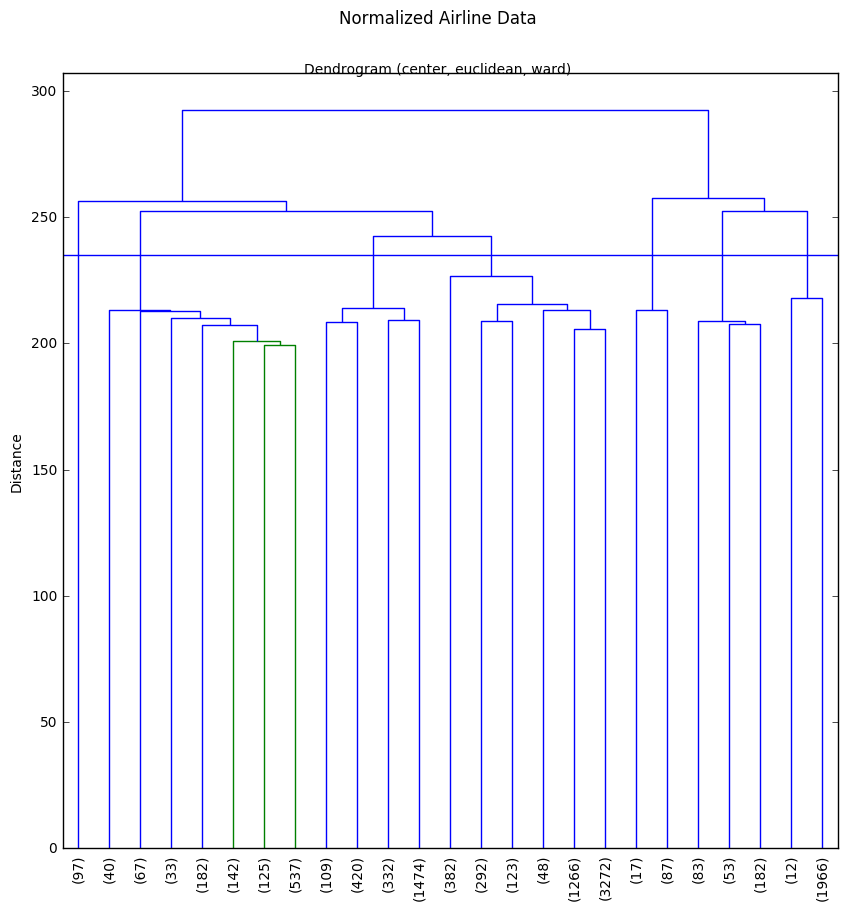

In [41]:
fig, axes = pyplot.subplots(1, 1, figsize=(10, 10))
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Normalized Airline Data",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)
axhline(y=235)

In [38]:
from scipy.cluster.hierarchy import fcluster


k=7
clusters = fcluster(link_matrix, k, criterion='maxclust')
clusters

array([4, 4, 4, ..., 3, 4, 3], dtype=int32)

In [39]:
pd.value_counts(pd.Series(clusters))

4    5383
3    2335
7    1978
2    1126
6     318
5     104
1      97
dtype: int64

In [40]:
df_clusters=pd.DataFrame(clusters)
df_clusters.head()

,0
0,4
1,4
2,4
3,4
4,4


In [41]:
p_data2['cluster']=df_clusters
p_data2.head()

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster
0,-384,40.33333,23.50000,152,56355172,370758,31.9938,0,1,0,...,0,0,0,0,1,0,0,0,0,4
1,-427,37.96667,23.71667,142,46812003,329662,31.9888,0,1,0,...,0,0,0,0,1,0,0,0,0,4
2,-4,32.50000,34.90000,214,60299092,281771,31.8981,0,1,0,...,0,0,0,0,0,1,0,0,0,4
3,-469,37.96667,23.71667,137,40307143,294213,31.6521,0,1,0,...,0,0,0,0,1,0,0,0,0,4
4,-356,40.80000,22.51667,138,48358148,350421,31.5840,0,1,0,...,0,0,0,0,0,1,0,0,0,4


In [42]:
grouped_df_clusters = p_data2.sort_values(by = ['cluster'], ascending = True)
grouped_df_clusters.head(10)

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster
5700,1790,48.85000,-0.55000,34,337453,9925,23.0115,0,1,0,...,0,0,0,1,0,0,0,0,0,1
709,1451,0.00000,0.00000,57,3723102,65318,26.4978,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4456,1865,59.32944,18.06861,33,765062,23184,23.7069,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7810,1933,0.00000,0.00000,28,397426,14194,21.4311,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7834,1935,32.80361,-108.06083,29,875315,30183,21.3931,0,1,0,...,0,0,0,1,0,0,0,0,0,1
448,1371,25.05000,101.86667,106,4143169,39087,27.1114,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4354,1729,48.85670,2.35080,31,892078,28777,23.7620,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5698,1619,51.95000,5.23333,29,664233,22905,23.0126,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7921,1923,40.88940,-74.04570,27,699001,25889,21.2655,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5708,1800,51.50722,-0.12750,36,470125,13059,23.0066,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
np.set_printoptions(suppress=True)

p_data2_count = p_data2.groupby(['cluster']).count().round(0)
p_data2_count

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
cluster,,,,,,,,,,,,,,,,,,,,,
1,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
2,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,...,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126
3,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335,...,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335
4,5383,5383,5383,5383,5383,5383,5383,5383,5383,5383,...,5383,5383,5383,5383,5383,5383,5383,5383,5383,5383
5,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
6,318,318,318,318,318,318,318,318,318,318,...,318,318,318,318,318,318,318,318,318,318
7,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,...,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978


In [44]:
# Supress scientific notation. Output numbers look neat without 10 digit long precision values
np.set_printoptions(suppress=True)

p_data2_mean = p_data2.groupby(['cluster']).mean()
p_data2_mean

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
cluster,,,,,,,,,,,,,,,,,,,,,
1,1691.690722,39.202829,-9.524706,46.886598,3.468576e+06,53086.092784,23.410601,0.072165,0.927835,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1811.876554,44.880534,-18.121572,41.042629,1.971627e+06,35734.113677,23.340004,0.031083,0.968917,0.000000,...,0.159858,0.000888,0.000888,0.000000,0.000000,0.001776,0.005329,0.000000,0.991119,0.000888
3,1863.154604,23.496218,-3.727953,37.841113,3.354281e+06,77868.106210,19.620216,0.094218,0.905782,0.000000,...,0.000857,0.432548,0.065096,0.000000,0.000857,0.051820,0.220985,0.006852,0.022270,0.632120
4,1427.783206,37.942538,12.796482,42.254876,2.940868e+06,56696.789523,23.485993,0.084525,0.915475,0.004087,...,0.000929,0.040126,0.142300,0.000743,0.000557,0.222738,0.542448,0.004830,0.035296,0.051087
5,1893.701923,39.173052,-29.777792,37.326923,5.826723e+06,128689.942308,22.393221,0.038462,0.961538,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1673.336478,35.457063,-12.175351,37.827044,6.128636e+06,150853.839623,22.586750,0.544025,0.455975,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006289,0.993711,0.000000,0.000000
7,1937.688574,41.588835,-52.753303,40.350859,9.537957e+06,212452.424671,21.566330,0.303842,0.696158,0.000000,...,0.000000,0.001517,0.984328,0.000000,0.000000,0.003539,0.006067,0.000000,0.004044,0.002022


In [45]:
#Dropping hierarchacle cluster column
p_data3 = p_data2.drop(p_data2.columns[[336]], axis=1)
p_data3.head()


,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Social Sciences,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports
0,-384,40.33333,23.50000,152,56355172,370758,31.9938,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-427,37.96667,23.71667,142,46812003,329662,31.9888,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-4,32.50000,34.90000,214,60299092,281771,31.8981,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-469,37.96667,23.71667,137,40307143,294213,31.6521,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-356,40.80000,22.51667,138,48358148,350421,31.5840,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
p_data3.shape

(11341, 336)

In [47]:
########## starting k-means clustering  #########

p_data3_array = np.array(p_data3)

# Print first five rows of data
p_data3_array[0:5]

array([[-384.     ,   40.33333,   23.5    , ...,    0.     ,    0.     ,
           0.     ],
       [-427.     ,   37.96667,   23.71667, ...,    0.     ,    0.     ,
           0.     ],
       [  -4.     ,   32.5    ,   34.9    , ...,    0.     ,    0.     ,
           0.     ],
       [-469.     ,   37.96667,   23.71667, ...,    0.     ,    0.     ,
           0.     ],
       [-356.     ,   40.8    ,   22.51667, ...,    0.     ,    0.     ,
           0.     ]])

In [48]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(p_data3_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [50]:
centroids

array([[ 1626.69829007,    36.01831096,    -1.45740086, ...,
            0.02801813,     0.13370416,     0.1645035 ],
       [ 1845.47693351,    37.78637891,   -34.42646219, ...,
            0.05359566,     0.03867028,     0.10040706],
       [ 1824.42767296,    35.82189208,   -47.62092931, ...,
            0.04402516,     0.06918239,     0.06918239]])

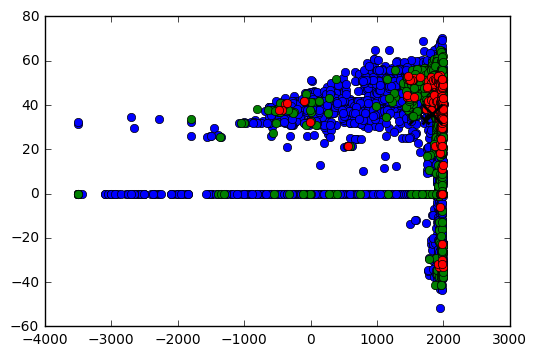

In [51]:
for i in range(k): # repeat loop n times for n clusters
    ds = p_data3_array[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

In [52]:
pd.value_counts(pd.Series(labels))

0    9708
1    1474
2     159
dtype: int64

In [53]:
df2_clusters=pd.DataFrame(labels)
df2_clusters.head()

,0
0,2
1,2
2,2
3,2
4,2


In [54]:
p_data2['k-means cluster']=df2_clusters
p_data2.head()

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster,k-means cluster
0,-384,40.33333,23.50000,152,56355172,370758,31.9938,0,1,0,...,0,0,0,1,0,0,0,0,4,2
1,-427,37.96667,23.71667,142,46812003,329662,31.9888,0,1,0,...,0,0,0,1,0,0,0,0,4,2
2,-4,32.50000,34.90000,214,60299092,281771,31.8981,0,1,0,...,0,0,0,0,1,0,0,0,4,2
3,-469,37.96667,23.71667,137,40307143,294213,31.6521,0,1,0,...,0,0,0,1,0,0,0,0,4,2
4,-356,40.80000,22.51667,138,48358148,350421,31.5840,0,1,0,...,0,0,0,0,1,0,0,0,4,2


In [55]:
grouped_df_clusters2 = p_data2.sort_values(by = ['k-means cluster'], ascending = True)
grouped_df_clusters2.head(10)

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster,k-means cluster
5670,1608,40.84500,14.25833,29,199559,6881,23.0280,0,1,0,...,0,0,0,0,0,0,1,0,2,0
7106,1911,18.85000,95.38333,26,724007,27846,22.1357,0,1,0,...,0,0,0,0,1,0,0,0,4,0
7107,1918,39.46959,-87.38976,29,670184,23110,22.1321,0,1,0,...,0,0,0,1,0,0,0,0,4,0
7108,1894,40.44167,-80.00000,34,7669512,225574,22.1318,1,0,0,...,1,0,0,0,0,0,0,0,7,0
7109,1948,59.35000,18.00000,31,1597060,51518,22.1298,0,1,0,...,0,0,0,0,0,0,0,1,3,0
7110,1928,31.24447,-90.47159,31,3252711,104926,22.1296,0,1,0,...,1,0,0,0,0,0,0,0,7,0
7111,1953,52.20500,0.11900,42,2304054,54858,22.1296,0,1,0,...,0,0,0,0,0,0,1,0,2,0
7112,1930,0.00000,-30.00000,41,1176290,28690,22.1296,0,1,0,...,0,0,0,0,1,0,0,0,3,0
7103,1856,43.04583,-75.87389,34,2451631,72107,22.1394,0,1,0,...,0,0,0,1,0,0,0,0,4,0
7113,1867,53.02639,20.56417,26,915561,35214,22.1287,0,1,0,...,0,0,0,0,0,0,1,0,4,0


In [56]:
np.set_printoptions(suppress=True)

p_data2km_count = p_data2.groupby(['k-means cluster']).count().round(0)
p_data2km_count

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster
k-means cluster,,,,,,,,,,,,,,,,,,,,,
0,9708,9708,9708,9708,9708,9708,9708,9708,9708,9708,...,9708,9708,9708,9708,9708,9708,9708,9708,9708,9708
1,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,...,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474
2,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159


In [57]:
# Supress scientific notation. Output numbers look neat without 10 digit long precision values
np.set_printoptions(suppress=True)

p_data2km_mean = p_data2.groupby(['k-means cluster']).mean()
p_data2km_mean

,birth_year,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,sex_Female,sex_Male,country_Afghanistan,...,industry_Team Sports,domain_Arts,domain_Business & Law,domain_Exploration,domain_Humanities,domain_Institutions,domain_Public Figure,domain_Science & Technology,domain_Sports,cluster
k-means cluster,,,,,,,,,,,,,,,,,,,,,
0,1626.698290,36.018311,-1.457401,37.600021,1.960500e+06,51912.916358,22.217478,0.109497,0.890503,0.002266,...,0.116296,0.197157,0.009065,0.009580,0.122270,0.335703,0.028018,0.133704,0.164504,3.956325
1,1845.476934,37.786379,-34.426462,55.886703,1.400395e+07,281536.052917,22.637061,0.265265,0.734735,0.000000,...,0.063772,0.579376,0.011533,0.005427,0.092266,0.118725,0.053596,0.038670,0.100407,5.341927
2,1824.427673,35.821892,-47.620929,93.748428,5.010091e+07,597724.817610,24.562002,0.257862,0.742138,0.000000,...,0.044025,0.616352,0.018868,0.006289,0.037736,0.138365,0.044025,0.069182,0.069182,5.522013


In [ ]:
######## steps for PCA from article #######

#pca = PCA(n_components=44)

#pca.fit(X)

#The amount of variance that each PC explains
#var= pca.explained_variance_ratio_

#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print var1
#[  10.37   17.68   23.92   29.7    34.7    39.28   43.67   46.53   49.27
#51.92   54.48   57.04   59.59   62.1    64.59   67.08   69.55   72.
#74.39   76.76   79.1    81.44   83.77   86.06   88.33   90.59   92.7
#94.76   96.78   98.44  100.01  100.01  100.01  100.01  100.01  100.01
#100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01]

#plt.plot(var1)

#Looking at above plot I'm taking 30 variables
#pca = PCA(n_components=30)
#pca.fit(X)
#X1=pca.fit_transform(X)

#print X1

In [ ]:
########### PCA Analysis ##########

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [83]:
# Running PCA analysis with 2 components

pca = PCA(n_components=2)

In [84]:
# Fitting the standardized data

pca.fit(p_data2Norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
# Transform the standardized data into an array

pan_pca = pca.transform(p_data2Norm)
pan_pca

array([[-0.40896056, -2.66070235],
       [-0.76455282, -2.45291582],
       [-1.50774405, -5.11745646],
       ..., 
       [ 1.16360298,  3.79282278],
       [-0.11986751,  5.31239469],
       [ 3.81478554,  2.52000052]])

In [86]:
# Create a dataframe

pan_pca_df = pd.DataFrame(pan_pca)

In [87]:
pan_pca_df.index = p_data2.index

In [88]:

pan_pca_df.head()

,0,1
0,-0.408961,-2.660702
1,-0.764553,-2.452916
2,-1.507744,-5.117456
3,-1.007822,-2.289514
4,-1.177130,-3.137166


In [89]:
# Added labels to dataframe

pan_pca_df.columns = ['PC1','PC2']
pan_pca_df.head()

,PC1,PC2
0,-0.408961,-2.660702
1,-0.764553,-2.452916
2,-1.507744,-5.117456
3,-1.007822,-2.289514
4,-1.177130,-3.137166


In [ ]:
####### DBSCAN Analysis ########

In [90]:
data = np.array(pan_pca_df)
data

array([[-0.40896056, -2.66070235],
       [-0.76455282, -2.45291582],
       [-1.50774405, -5.11745646],
       ..., 
       [ 1.16360298,  3.79282278],
       [-0.11986751,  5.31239469],
       [ 3.81478554,  2.52000052]])

In [91]:
#Run the DBSCAN algorithm on Data to construct a DBSCAN object

db = DBSCAN(eps = 0.5, min_samples = 100).fit(pan_pca_df)
db

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=100, n_jobs=1, p=None)

In [92]:
print(db.labels_)


[-1 -1 -1 ...,  1  1 -1]


In [93]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [94]:
# Assign "True" to the indexes in core_samples_mask list for the samples where dbscan was able to cluster the points.

core_samples_mask[db.core_sample_indices_] = True

In [104]:
labels = db.labels_
labels

array([-1, -1, -1, ...,  1,  1, -1])

In [96]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [97]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler



unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[ 0.61960787,  0.00392157,  0.25882354,  1.        ],
       [ 0.99807766,  0.99923107,  0.74602078,  1.        ],
       [ 0.36862746,  0.30980393,  0.63529414,  1.        ]])

In [99]:
indexes= zip(unique_labels, colors)
list(indexes)

[(0, array([ 0.61960787,  0.00392157,  0.25882354,  1.        ])),
 (1, array([ 0.99807766,  0.99923107,  0.74602078,  1.        ])),
 (-1, array([ 0.36862746,  0.30980393,  0.63529414,  1.        ]))]

/usr/lib64/python3.4/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


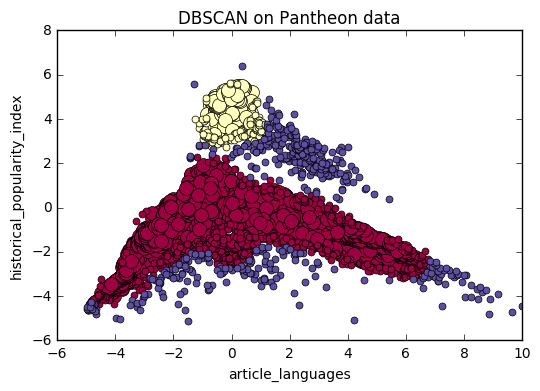

In [101]:
for(label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    xy2 = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Pantheon data")
plt.xlabel("article_languages")
plt.ylabel("historical_popularity_index")


In [136]:
#Print the outliers which are the labels that couldn't be assigned to any cluster
outliers_cluster = pantheon_data.loc[labels==-1,]
outliers_cluster

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584
5,18079,Leonardo da Vinci,Male,1452,Vinci,NaN,Italy,Europe,43.78333,10.91667,Inventor,Invention,Science & Technology,174,88931135,511098,31.4644
6,5823,Confucius,Male,-551,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705
7,15924,Julius Caesar,Male,-100,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
11,19577,Moses,Male,-1391,Wadi Tumilat,NaN,Egypt,Africa,NaN,NaN,Religious Figure,Religion,Institutions,115,21880195,190263,30.8632
12,18934,Muhammad,Male,570,Mecca,NaN,Saudi Arabia,Asia,21.41667,39.81667,Religious Figure,Religion,Institutions,150,43026648,286844,30.65


In [154]:
cluster1 = pantheon_data.loc[labels==1,]
cluster1

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
322,24953,Pelé,Male,1940,Três Corações,NaN,Brazil,South America,-21.69472,-45.25528,Soccer Player,Team Sports,Sports,88,24153197,274468,27.4466
1308,60090,Enzo Ferrari,Male,1898,Modena,NaN,Italy,Europe,44.65000,10.93333,Racecar Driver,Individual Sports,Sports,45,4461440,99143,25.7119
1342,152680,Franz Beckenbauer,Male,1945,Munich,NaN,Germany,Europe,48.13333,11.56667,Soccer Player,Team Sports,Sports,56,7520144,134288,25.6776
1565,700574,Garrincha,Male,1933,Pau Grande,NaN,Brazil,South America,-22.58444,-43.16972,Soccer Player,Team Sports,Sports,47,3950770,84059,25.4791
1585,205150,Ferenc Puskás,Male,1927,Budapest,NaN,Hungary,Europe,47.49250,19.05139,Soccer Player,Team Sports,Sports,57,3879181,68056,25.4507
1620,26276416,Johan Cruijff,Male,1947,Amsterdam,NaN,Netherlands,Europe,52.36667,4.90000,Soccer Player,Team Sports,Sports,61,8708276,142759,25.4221
1850,426381,George Best,Male,1946,Belfast,NaN,United Kingdom,Europe,54.59700,-5.93000,Soccer Player,Team Sports,Sports,51,7456666,146209,25.2373
1922,615788,Alfredo Di Stéfano,Male,1926,Buenos Aires,NaN,Argentina,South America,-34.65000,-58.38333,Soccer Player,Team Sports,Sports,52,4691132,90214,25.1804
1981,60886,Lev Yashin,Male,1929,Moscow,NaN,Russia,Europe,55.75000,37.61667,Soccer Player,Team Sports,Sports,49,3214228,65596,25.1376
2365,43223,Alex Ferguson,Male,1941,Govan,NaN,United Kingdom,Europe,55.86150,-4.30830,Coach,Team Sports,Sports,66,13949659,211358,24.8701


In [155]:
cluster0 = pantheon_data.loc[labels==0,]
cluster0

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
8,13633,Homer,Male,-800,Smyrna,NaN,Turkey,Europe,38.41861,27.13917,Writer,Language,Humanities,141,20839405,147797,31.1087
9,23275,Pythagoras,Male,-570,Samos Island,NaN,Greece,Europe,37.75000,26.83333,Philosopher,Philosophy,Humanities,114,26168219,229546,31.0691
10,1844,Archimedes,Male,-287,Syracuse,NaN,Italy,Europe,37.08333,15.28333,Mathematician,Math,Science & Technology,129,22022077,170714,30.9907
19,1273,Augustus,Male,-63,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,117,20307663,173570,30.4195
21,14627,Isaac Newton,Male,1642,Woolsthorpe-by-Colsterworth,NaN,United Kingdom,Europe,52.80986,-0.62877,Physicist,Natural Sciences,Science & Technology,191,59909049,313660,30.2889
22,736,Albert Einstein,Male,1879,Ulm,NaN,Germany,Europe,48.40000,9.98333,Physicist,Natural Sciences,Science & Technology,166,89771090,540790,30.2106
23,5635,Christopher Columbus,Male,1451,Genoa,NaN,Italy,Europe,44.41111,8.93278,Explorer,Explorers,Exploration,153,58442090,381974,30.1753
24,9906294,Johann Sebastian Bach,Male,1685,Eisenach,NaN,Germany,Europe,50.97611,10.32056,Composer,Music,Arts,144,29753654,206623,30.1672
25,8169,Dante Alighieri,Male,1265,Florence,NaN,Italy,Europe,43.78333,11.25000,Writer,Language,Humanities,137,20540747,149932,30.1496
26,17914,Ludwig van Beethoven,Male,1770,Bonn,NaN,Germany,Europe,50.73399,7.09981,Composer,Music,Arts,153,48132344,314590,30.1093


In [140]:
outliers_cluster_men = outliers_cluster[outliers_cluster["sex"]=="Male"]
outliers_cluster_men.sort_values(by = ['domain', 'industry','occupation'])


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
115,14980,Imhotep,Male,-2650,Memphis,NaN,Egypt,Africa,29.84472,31.25083,Architect,Design,Arts,56,4231465,75562,28.6228
250,32794,Marcus Vitruvius Pollio,Male,-80,Other,NaN,Unknown,NaN,41.26667,13.61667,Architect,Design,Arts,53,3436829,64846,27.7414
2404,14981,Iktinos,Male,-450,Other,NaN,Unknown,Unknown,NaN,NaN,Architect,Design,Arts,26,221525,8520,24.8434
3919,16821,Kallikrates,Male,-450,Other,NaN,Unknown,Unknown,NaN,NaN,Architect,Design,Arts,26,169549,6521,23.9963
232,37313,Bruce Lee,Male,1940,San Francisco-Bay Area,CA,United States,North America,37.79472,-122.40722,Actor,Film And Theatre,Arts,84,56281877,670022,27.8142
1157,144936,Jackie Chan,Male,1954,Victoria Peak,NaN,NaN,Asia,22.27547,114.14383,Actor,Film And Theatre,Arts,81,44209817,545800,25.8672
2020,71870,Johnny Depp,Male,1963,Owensboro,KY,United States,North America,37.75775,-87.11839,Actor,Film And Theatre,Arts,80,83016743,1037709,25.1155
2327,44849,Brad Pitt,Male,1963,Shawnee,OK,United States,North America,35.34250,-96.93389,Actor,Film And Theatre,Arts,86,55005621,639600,24.8892
4946,154698,Will Smith,Male,1968,Philadelphia,PA,United States,North America,NaN,NaN,Actor,Film And Theatre,Arts,74,55709750,752834,23.4385
5046,16603,Keanu Reeves,Male,1964,Beirut,NaN,Lebanon,Asia,33.88694,35.51306,Actor,Film And Theatre,Arts,68,30400034,447059,23.3863


In [144]:
outliers_cluster_men_sports = outliers_cluster_men[outliers_cluster_men["domain"]=="Sports"]
outliers_cluster_men_sports.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
4267,46827,Jesse Owens,Male,1913,Oakville,AL,United States,North America,34.44537,-87.16224,Athlete,Individual Sports,Sports,56,5945765,106174,23.8071
7678,53869,Jim Thorpe,Male,1888,Prague,OK,United States,North America,35.20000,-96.94000,Athlete,Individual Sports,Sports,31,2929099,94487,21.5816
7926,305498,Bob Beamon,Male,1946,New York,NY,United States,North America,NaN,NaN,Athlete,Individual Sports,Sports,33,1098060,33275,21.2623
8012,337649,Ray Ewry,Male,1873,Lafayette,IN,United States,North America,40.41722,-86.87861,Athlete,Individual Sports,Sports,26,312401,12015,21.1591
8053,671265,Al Oerter,Male,1936,New York,NY,United States,North America,40.77444,-73.90417,Athlete,Individual Sports,Sports,30,348057,11602,21.096
8341,67127,Carl Lewis,Male,1961,Birmingham,AL,United States,North America,33.52500,-86.81300,Athlete,Individual Sports,Sports,55,6479265,117805,20.6724
9211,313153,Mike Powell,Male,1963,Philadelphia,PA,United States,North America,39.95000,-75.16667,Athlete,Individual Sports,Sports,30,677076,22569,19.1808
9396,653621,Michael Johnson,Male,1967,Dallas,TX,United States,North America,32.77583,-96.79667,Athlete,Individual Sports,Sports,38,1280029,33685,18.7865
9404,578206,Edwin Moses,Male,1955,Dayton,OH,United States,North America,39.75944,-84.19167,Athlete,Individual Sports,Sports,26,690312,26550,18.7727
9425,661919,Javier Sotomayor,Male,1967,Limonar,NaN,Cuba,North America,22.95611,-81.40861,Athlete,Individual Sports,Sports,32,1133179,35412,18.7386


In [145]:
outliers_cluster_men_other = outliers_cluster_men[outliers_cluster_men["domain"]!="Sports"]
outliers_cluster_men_other.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
115,14980,Imhotep,Male,-2650,Memphis,NaN,Egypt,Africa,29.84472,31.25083,Architect,Design,Arts,56,4231465,75562,28.6228
250,32794,Marcus Vitruvius Pollio,Male,-80,Other,NaN,Unknown,NaN,41.26667,13.61667,Architect,Design,Arts,53,3436829,64846,27.7414
2404,14981,Iktinos,Male,-450,Other,NaN,Unknown,Unknown,NaN,NaN,Architect,Design,Arts,26,221525,8520,24.8434
3919,16821,Kallikrates,Male,-450,Other,NaN,Unknown,Unknown,NaN,NaN,Architect,Design,Arts,26,169549,6521,23.9963
232,37313,Bruce Lee,Male,1940,San Francisco-Bay Area,CA,United States,North America,37.79472,-122.40722,Actor,Film And Theatre,Arts,84,56281877,670022,27.8142
1157,144936,Jackie Chan,Male,1954,Victoria Peak,NaN,NaN,Asia,22.27547,114.14383,Actor,Film And Theatre,Arts,81,44209817,545800,25.8672
2020,71870,Johnny Depp,Male,1963,Owensboro,KY,United States,North America,37.75775,-87.11839,Actor,Film And Theatre,Arts,80,83016743,1037709,25.1155
2327,44849,Brad Pitt,Male,1963,Shawnee,OK,United States,North America,35.34250,-96.93389,Actor,Film And Theatre,Arts,86,55005621,639600,24.8892
4946,154698,Will Smith,Male,1968,Philadelphia,PA,United States,North America,NaN,NaN,Actor,Film And Theatre,Arts,74,55709750,752834,23.4385
5046,16603,Keanu Reeves,Male,1964,Beirut,NaN,Lebanon,Asia,33.88694,35.51306,Actor,Film And Theatre,Arts,68,30400034,447059,23.3863


In [152]:
outliers_cluster_men_other_Institutions = outliers_cluster_men_other[outliers_cluster_men_other["domain"]=="Institutions"]
outliers_cluster_men_other_Institutions.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
7,15924,Julius Caesar,Male,-100,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
14,2731583,Adolf Hitler,Male,1889,Braunau am Inn,NaN,Austria,Europe,48.25833,13.03500,Politician,Government,Institutions,169,128368798,759579,30.5778
16,5314,Charlemagne,Male,742,Liège,NaN,Belgium,Europe,NaN,NaN,Politician,Government,Institutions,116,26626252,229537,30.4837
20,69880,Napoleon Bonaparte,Male,1769,Corsica,NaN,France,Europe,41.92670,8.73690,Politician,Government,Institutions,145,57559307,396961,30.3263
45,13959,Hannibal Barca,Male,-248,Carthage,NaN,Tunisia,Africa,36.85806,10.33083,Politician,Government,Institutions,86,18246118,212164,29.6911
75,26983,Saladin,Male,1138,Tikrit,NaN,Iraq,Asia,34.60000,43.68333,Politician,Government,Institutions,104,14119978,135769,29.1401
89,18553,Louis XIV of France,Male,1638,Paris,NaN,France,Europe,48.89806,2.09639,Politician,Government,Institutions,89,25431554,285748,28.9814
92,15641,Joseph Stalin,Male,1878,Gori,NaN,Georgia,Asia,41.96667,44.10000,Politician,Government,Institutions,134,42908561,320213,28.9317
121,19283178,Benito Mussolini,Male,1883,Predappio,NaN,Italy,Europe,44.10000,11.98333,Politician,Government,Institutions,105,30179131,287420,28.5507
134,19527,Mao Zedong,Male,1893,Shaoshan,NaN,China,Asia,27.91000,112.48000,Politician,Government,Institutions,122,29051982,238131,28.4606


In [161]:
outliers_cluster_men_other_Institutions_US = outliers_cluster_men_other_Institutions[outliers_cluster_men_other_Institutions["country"]=="United States"]
outliers_cluster_men_other_Institutions_US.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
186,3986,Benjamin Franklin,Male,1706,Boston,MA,United States,North America,42.35806,-71.06361,Politician,Government,Institutions,88,29472054,334910,28.0867
192,11968,George Washington,Male,1732,Westmoreland County,VA,United States,North America,38.11000,-76.80000,Politician,Government,Institutions,134,34838477,259989,28.046
259,5119376,John F. Kennedy,Male,1917,Boston,MA,United States,North America,42.33167,-71.12167,Politician,Government,Institutions,116,57596834,496524,27.6634
314,29922,Thomas Jefferson,Male,1743,Shadwell,VA,United States,North America,38.01238,-78.41778,Politician,Government,Institutions,113,26350722,233192,27.4789
341,10979,Franklin D. Roosevelt,Male,1882,Poughkeepsie,NY,United States,North America,41.78333,-73.90000,Politician,Government,Institutions,113,34162617,302324,27.3888
396,25433,Ronald Reagan,Male,1911,Tampico,IL,United States,North America,41.63056,-89.78528,Politician,Government,Institutions,107,35787293,334461,27.2281
478,25473,Richard Nixon,Male,1913,Los Angeles,CA,United States,North America,33.88855,-117.81323,Politician,Government,Institutions,103,27325221,265293,27.0141
595,3418303,Harry S. Truman,Male,1884,Lamar,MO,United States,North America,37.49361,-94.27222,Politician,Government,Institutions,100,16028484,160285,26.7264
612,3414021,George Bush,Male,1946,New Haven,CT,United States,North America,41.31000,-72.92361,Politician,Government,Institutions,143,42866705,299767,26.6982
621,8182,Dwight D. Eisenhower,Male,1890,Denison,TX,United States,North America,33.74972,-96.55750,Politician,Government,Institutions,99,19052830,192453,26.6847


In [157]:
cluster0_institutions = cluster0[cluster0['domain']=='Institutions']
cluster0_institutions.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
344,81672,Gaius Marius,Male,-157,Arpino,NaN,Italy,Europe,41.64778,13.60972,Diplomat,Government,Institutions,46,2819852,61301,27.3871
785,16844,Kofi Annan,Male,1938,Kumasi,NaN,Ghana,Africa,6.66667,-1.61667,Diplomat,Government,Institutions,104,6811032,65491,26.3496
1771,48542,Charles Maurice de Talleyrand-Périgord,Male,1754,Paris,NaN,France,Europe,48.85670,2.35080,Diplomat,Government,Institutions,52,2277539,43799,25.3067
2170,236428,Dag Hammarskjöld,Male,1905,Jönköping,NaN,Sweden,Europe,57.78278,14.16056,Diplomat,Government,Institutions,64,2341876,36592,25.0032
2448,211193,Boutros Boutros-Ghali,Male,1922,Cairo,NaN,Egypt,Africa,30.05000,31.23333,Diplomat,Government,Institutions,56,2227563,39778,24.8138
2491,2346975,Ban Ki-moon,Male,1944,Eumseong County,NaN,South Korea,Asia,37.00000,127.58300,Diplomat,Government,Institutions,90,8192182,91024,24.7903
3133,24644,Pope Innocent IX,Male,1519,Bologna,NaN,Italy,Europe,44.50750,11.35139,Diplomat,Government,Institutions,50,597082,11942,24.4288
3886,64749,Alva Myrdal,Female,1902,Uppsala,NaN,Sweden,Europe,59.85806,17.64472,Diplomat,Government,Institutions,39,470557,12066,24.0151
3913,171653,Raoul Wallenberg,Male,1912,Lidingö Municipality,NaN,Sweden,Europe,59.36667,18.15000,Diplomat,Government,Institutions,37,2548205,68870,24.0023
4073,314522,Ferdinand de Lesseps,Male,1805,Paris,NaN,France,Europe,48.80530,2.13500,Diplomat,Government,Institutions,34,1188506,34956,23.9059


In [171]:
cluster0_institutions_US = cluster0_institutions[cluster0_institutions['country']=='United States']
                                        
cluster0_institutions_US.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
6113,322401,John Mott,Male,1865,Livingston Manor,NY,United States,North America,41.72944,-74.82722,Diplomat,Government,Institutions,32,215988,6750,22.7867
7214,386023,George F. Kennan,Male,1904,Milwaukee,WI,United States,North America,43.05000,-87.95000,Diplomat,Government,Institutions,30,1637817,54594,22.0397
7634,80100,Dean Acheson,Male,1893,Middletown,CT,United States,North America,41.56222,-72.65083,Diplomat,Government,Institutions,27,821832,30438,21.6238
7712,316772,Ralph Bunche,Male,1903,Detroit,MI,United States,North America,42.33139,-83.04583,Diplomat,Government,Institutions,36,692818,19245,21.5411
7850,21816397,John Jay,Male,1745,New York,NY,United States,North America,40.71270,-74.00590,Diplomat,Government,Institutions,28,1858072,66360,21.3612
8581,52737,Adlai Stevenson II,Male,1900,Los Angeles,CA,United States,North America,34.05000,-118.25000,Diplomat,Government,Institutions,26,790145,30390,20.3005
9076,313649,Richard Holbrooke,Male,1941,New York,NY,United States,North America,40.79028,-73.95972,Diplomat,Government,Institutions,41,1625797,39654,19.4265
10531,36993318,J. Christopher Stevens,Male,1960,Grass Valley,CA,United States,North America,39.21917,-121.05833,Diplomat,Government,Institutions,28,704653,25166,16.3003
8037,71908,Earl Warren,Male,1891,Los Angeles,CA,United States,North America,34.05000,-118.25000,Judge,Government,Institutions,26,2075222,79816,21.1249
8158,21825423,John Marshall,Male,1755,Germantown,VA,United States,North America,38.61361,-77.74167,Judge,Government,Institutions,26,2670063,102695,20.9263


In [172]:
cluster0_institutions_US_politician = cluster0_institutions_US[cluster0_institutions_US['occupation']=='Politician']
                                        
cluster0_institutions_US_politician.sort_values(by = ['historical_popularity_index'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
11243,409052,Paul Ryan,Male,1970,Janesville,WI,United States,North America,42.68389,-89.01639,Politician,Government,Institutions,35,5927569,169359,13.5545
11108,1133032,Bobby Jindal,Male,1971,Baton Rouge,LA,United States,North America,30.45000,-91.14000,Politician,Government,Institutions,29,3843387,132531,14.484
10574,21378255,Eliot Spitzer,Male,1959,New York,NY,United States,North America,40.89400,-73.91300,Politician,Government,Institutions,29,4706307,162286,16.1805
10529,412023,Rahm Emanuel,Male,1959,Chicago,IL,United States,North America,41.83694,-87.68472,Politician,Government,Institutions,27,6953768,257547,16.3017
10342,3059677,David Paterson,Male,1954,New York,NY,United States,North America,40.69278,-73.99028,Politician,Government,Institutions,30,2306967,76899,16.77
10152,26713474,Rick Santorum,Male,1958,Winchester,VA,United States,North America,39.18333,-78.16667,Politician,Government,Institutions,36,7820622,217240,17.2407
9648,19065069,Boris Johnson,Male,1964,New York,NY,United States,North America,40.71270,-74.00590,Politician,Government,Institutions,45,4484694,99660,18.2924
9631,301237,Mike Huckabee,Male,1955,Hope,AR,United States,North America,33.66778,-93.59000,Politician,Government,Institutions,35,3111423,88898,18.3299
9537,545253,Rick Perry,Male,1950,Paint Creek,TX,United States,North America,33.06278,-99.67278,Politician,Government,Institutions,34,4698827,138201,18.5267
9475,166163,John Edwards,Male,1953,Seneca,SC,United States,North America,34.68417,-82.95583,Politician,Government,Institutions,34,4773370,140393,18.6221


In [153]:
outliers_cluster_men_other_humanities = outliers_cluster_men_other[outliers_cluster_men_other["domain"]=="Humanities"]
outliers_cluster_men_other_humanities.sort_values(by = ['domain', 'industry','occupation'])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
17,32897,William Shakespeare,Male,1564,Stratford-upon-Avon,NaN,United Kingdom,Europe,52.19000,-1.71000,Writer,Language,Humanities,163,74882297,459401,30.4398
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
6,5823,Confucius,Male,-551,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705


In [146]:
outlier_mean = p_data2.loc[labels==-1,].mean().round(2)
outlier_mean

birth_year                         1379.02
latitude                             27.37
longitude                           -42.25
article_languages                    52.52
page_views                     15551434.56
average_views                    239300.44
historical_popularity_index          21.27
sex_Female                            0.33
sex_Male                              0.67
country_Afghanistan                   0.00
country_Albania                       0.00
country_Algeria                       0.00
country_Andorra                       0.00
country_Angola                        0.00
country_Antigua And Barbuda           0.00
country_Argentina                     0.01
country_Armenia                       0.00
country_Aruba                         0.00
country_Australia                     0.00
country_Austria                       0.01
country_Azerbaijan                    0.00
country_Bahrain                       0.00
country_Bangladesh                    0.00
country_Bar

In [127]:
cluster1_mean = p_data2.loc[labels==1,].mean().round(2)
cluster1_mean

birth_year                        1973.45
latitude                            32.59
longitude                            6.31
article_languages                   35.28
page_views                     2552345.14
average_views                    63838.59
historical_popularity_index         17.60
sex_Female                           0.05
sex_Male                             0.95
country_Afghanistan                  0.00
country_Albania                      0.00
country_Algeria                      0.00
country_Andorra                      0.00
country_Angola                       0.00
country_Antigua And Barbuda          0.00
country_Argentina                    0.04
country_Armenia                      0.00
country_Aruba                        0.00
country_Australia                    0.02
country_Austria                      0.01
country_Azerbaijan                   0.00
country_Bahrain                      0.00
country_Bangladesh                   0.00
country_Barbados                  

In [128]:
cluster0_mean = p_data2.loc[labels==0,].mean().round(2)
cluster0_mean

birth_year                        1623.00
latitude                            37.31
longitude                           -6.45
article_languages                   40.99
page_views                     3844356.38
average_views                    85307.29
historical_popularity_index         23.11
sex_Female                           0.13
sex_Male                             0.87
country_Afghanistan                  0.00
country_Albania                      0.00
country_Algeria                      0.00
country_Andorra                      0.00
country_Angola                       0.00
country_Antigua And Barbuda          0.00
country_Argentina                    0.00
country_Armenia                      0.00
country_Aruba                        0.00
country_Australia                    0.01
country_Austria                      0.01
country_Azerbaijan                   0.00
country_Bahrain                      0.00
country_Bangladesh                   0.00
country_Barbados                  

In [ ]:
###### Findings #######

# Domains are the drivers for the clusters

In [ ]:
# Cluster 1 = Men mostly born in the 1800s - 1990s who play sports

In [ ]:
# Cluster 0 = Mostly men.  Born in acient times to modern times.  Skews towards goverment officials (like King Solomon) & 
# artists (like Vincent van Gogh) as well as some scientists (like Isaac Newton) and those invoved in Humanities (like Homer )

In [ ]:
# Outliers - There were several distinctions between the outlier make-up and clusters 1 & 0. Women, Sports & Institutions.
    # Highest percentage of women (probably where most of the women are between the 3 clusters). 
    # There were a lot of sports figures, which surprised me - I wondered why they weren't in cluster 1 with all of the other 
           # sports figures.  They tended to be mostly from North America while cluster 1 had very few from North America.  
    # Another difference was the arts.  Again, there seemed were more men from the United States than cluster 0.
    # And finally, there were differences in Institutions vs cluster 0.  
        #There were a lot of Unknowns in the outlier cluster.  
        #And the polititians from the US seemed to have more articles written about them than those found in cluster 0.